###Figure 3 from Nature Food Clark et al., 2023 

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
savedir = '/glade/p/univ/urtg0006/Brendan/nature_food_pdf_figs'

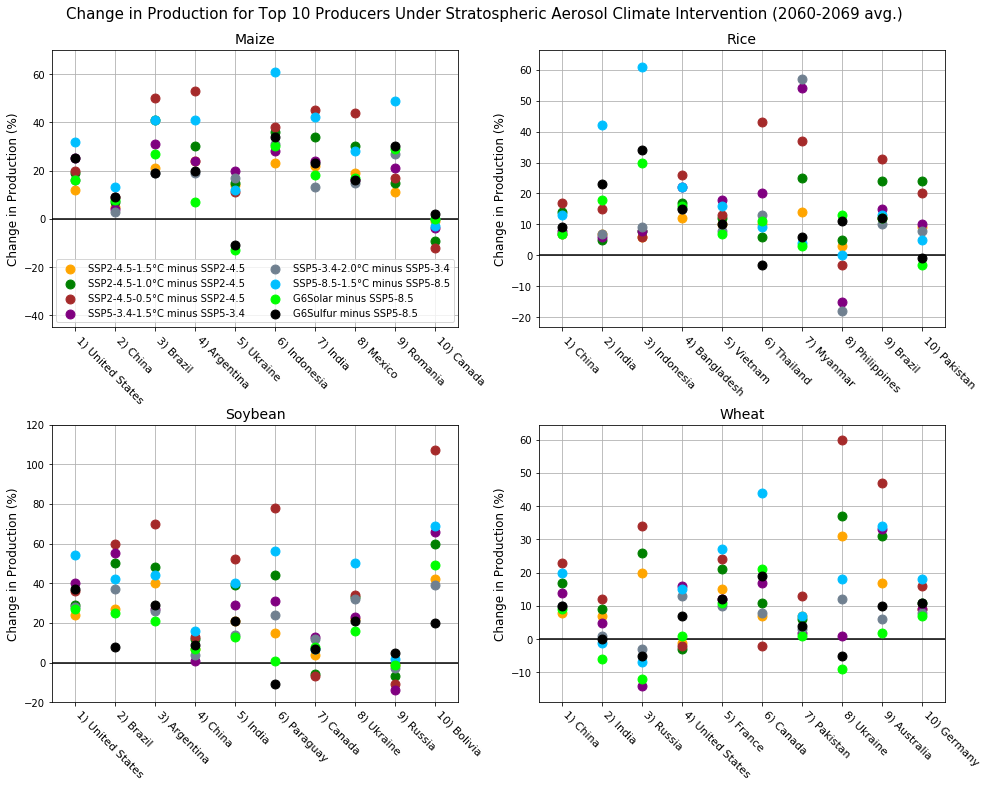

In [8]:
#All values are calculated from production that is regridded to national level with national_production_regrid.ncl
fig = plt.figure()
fig.set_size_inches(16,12)
fig.subplots_adjust(hspace = 0.35)
##MAIZE
ax1 = fig.add_subplot(221)
country1 = ["1) United States","2) China","3) Brazil","4) Argentina","5) Ukraine","6) Indonesia","7) India","8) Mexico","9) Romania","10) Canada"]
c4515 = np.array([12, 5, 21, 24, 14, 23, 22, 19, 11, -1])
c4510 = np.array([19, 7, 41, 30, 15, 36, 34, 30, 15, -9])
c4505 = np.array([20, 9, 50, 53, 11, 38, 45, 44, 17, -12])
c3415 = np.array([25, 4, 31, 24, 20, 28, 24, 16, 21, -4])
c3420 = np.array([16, 3, 19, 19, 17, 31, 13, 15, 27, 0])
c8515 = np.array([32, 13, 41, 41, 12, 61, 42, 28, 49, -3])
csol = np.array([16, 8, 27,  7, -13, 30, 18, 17, 29, 0])
csul = np.array([25, 9, 19, 20, -11, 34, 23, 16, 30, 2])
ax1.grid(zorder=0)
ax1.scatter(country1, c4515, s=80, zorder=3, color ='orange', label="SSP2-4.5-1.5°C minus SSP2-4.5")
ax1.scatter(country1, c4510, s=80, zorder=3, color ='green', label="SSP2-4.5-1.0°C minus SSP2-4.5")
ax1.scatter(country1, c4505, s=80, zorder=3, color ='brown', label="SSP2-4.5-0.5°C minus SSP2-4.5")
ax1.scatter(country1, c3415, s=80, zorder=3, color ='purple', label="SSP5-3.4-1.5°C minus SSP5-3.4")
ax1.scatter(country1, c3420, s=80, zorder=3, color ='slategray', label="SSP5-3.4-2.0°C minus SSP5-3.4")
ax1.scatter(country1, c8515, s=80, zorder=3, color ='deepskyblue', label="SSP5-8.5-1.5°C minus SSP5-8.5")
ax1.scatter(country1, csol, s=80, zorder=3, color ='lime', label="G6Solar minus SSP5-8.5")
ax1.scatter(country1, csul, s=80, zorder=3, color ='black', label="G6Sulfur minus SSP5-8.5")
ax1.legend(loc="lower center", ncol=2, prop={'size': 10})
ax1.set_ylim([-45, 70])
ax1.axhline(y=0, color='k', linestyle='-')
ax1.set_ylabel('Change in Production (%)',fontsize=12)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-45, fontsize=11, ha="left")
ax1.set_title('Maize',size=14)
##RICE
ax2 = fig.add_subplot(222)
country2 = ["1) China","2) India","3) Indonesia","4) Bangladesh","5) Vietnam","6) Thailand","7) Myanmar","8) Philippines","9) Brazil","10) Pakistan"]
r4515 = np.array([7, 7, 6, 12, 10, 10, 14, 3, 12, 9])
r4510 = np.array([14, 5, 8, 17, 12, 6, 25, 5, 24, 24])
r4505 = np.array([17, 15, 6, 26, 13, 43, 37, -3, 31, 20])
r3415 = np.array([8, 6, 8, 22, 18, 20, 54, -15, 15, 10])
r3420 = np.array([7, 7, 9, 15, 8, 13, 57, -18, 10, 8])
r8515 = np.array([13, 42, 61, 22, 16, 9, 4, 0, 13, 5])
rsol = np.array([7, 18, 30, 16, 7, 11, 3, 13, 12, -3])
rsul = np.array([9, 23, 34, 15, 10, -3, 6, 11, 12, -1])
ax2.grid(zorder=0)
ax2.scatter(country2, r4515, s=80, zorder=3, color ='orange', label="SSP2-4.5-1.5°C minus SSP2-4.5")
ax2.scatter(country2, r4510, s=80, zorder=3, color ='green', label="SSP2-4.5-1.0°C minus SSP2-4.5")
ax2.scatter(country2, r4505, s=80, zorder=3, color ='brown', label="SSP2-4.5-0.5°C minus SSP2-4.5")
ax2.scatter(country2, r3415, s=80, zorder=3, color ='purple', label="SSP5-3.4-1.5°C minus SSP5-3.4")
ax2.scatter(country2, r3420, s=80, zorder=3, color ='slategray', label="SSP5-3.4-2.0°C minus SSP5-3.4")
ax2.scatter(country2, r8515, s=80, zorder=3, color ='deepskyblue', label="SSP5-8.5-1.5°C minus SSP5-8.5")
ax2.scatter(country2, rsol, s=80, zorder=3, color ='lime', label="G6Solar minus SSP5-8.5")
ax2.scatter(country2, rsul, s=80, zorder=3, color ='black', label="G6Sulfur minus SSP5-8.5")
#ax1.legend(loc="lower center", ncol=2, prop={'size': 10})
#ax1.set_ylim([-45, 65])
ax2.axhline(y=0, color='k', linestyle='-')
ax2.set_ylabel('Change in Production (%)',fontsize=12)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-45, fontsize=11, ha="left")
ax2.set_title('Rice',size=14)
##SOYBEAN
ax3 = fig.add_subplot(223)
country3 = ["1) United States","2) Brazil","3) Argentina","4) China","5) India","6) Paraguay","7) Canada","8) Ukraine","9) Russia","10) Bolivia"]
s4515 = np.array([24, 27, 40, 7, 21, 15, 4, 22, -1, 42])
s4510 = np.array([29, 50, 48, 12, 39, 44, -6, 33, -7, 60])
s4505 = np.array([36, 60, 70, 13, 52, 78, -7, 34, -11, 107])
s3415 = np.array([40, 55, 27, 1, 29, 31, 13, 23, -14, 66])
s3420 = np.array([28, 37, 26, 4, 14, 24, 12, 32, -3, 39])
s8515 = np.array([54, 42, 44, 16, 40, 56, 7, 50, 2, 69])
ssol = np.array([27, 25, 21, 7, 13, 1, 8, 16, -1, 49])
ssul = np.array([37, 8, 29, 9, 21, -11, 7, 21, 5, 20])
ax3.grid(zorder=0)
ax3.scatter(country3, s4515, s=80, zorder=3, color ='orange', label="SSP2-4.5-1.5°C minus SSP2-4.5")
ax3.scatter(country3, s4510, s=80, zorder=3, color ='green', label="SSP2-4.5-1.0°C minus SSP2-4.5")
ax3.scatter(country3, s4505, s=80, zorder=3, color ='brown', label="SSP2-4.5-0.5°C minus SSP2-4.5")
ax3.scatter(country3, s3415, s=80, zorder=3, color ='purple', label="SSP5-3.4-1.5°C minus SSP5-3.4")
ax3.scatter(country3, s3420, s=80, zorder=3, color ='slategray', label="SSP5-3.4-2.0°C minus SSP5-3.4")
ax3.scatter(country3, s8515, s=80, zorder=3, color ='deepskyblue', label="SSP5-8.5-1.5°C minus SSP5-8.5")
ax3.scatter(country3, ssol, s=80, zorder=3, color ='lime', label="G6Solar minus SSP5-8.5")
ax3.scatter(country3, ssul, s=80, zorder=3, color ='black', label="G6Sulfur minus SSP5-8.5")
#ax1.legend(loc="lower center", ncol=2, prop={'size': 10})
ax3.set_ylim([-20, 120])
ax3.axhline(y=0, color='k', linestyle='-')
ax3.set_ylabel('Change in Production (%)',fontsize=12)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=-45, fontsize=11, ha="left")
ax3.set_title('Soybean',size=14)
##WEAT
ax4 = fig.add_subplot(224)
country4 = ["1) China","2) India","3) Russia","4) United States","5) France","6) Canada","7) Pakistan","8) Ukraine","9) Australia","10) Germany"]
w4515 = np.array([8, 7, 20, -1, 15, 7, 7, 31, 17, 9])
w4510 = np.array([17, 9, 26, -3, 21, 11, 6, 37, 31, 11])
w4505 = np.array([23, 12, 34, -2, 24, -2, 13, 60, 47, 16])
w3415 = np.array([14, 5, -14, 16, 12, 17, 2, 1, 33, 9])
w3420 = np.array([10, 1, -3, 13, 10, 8, 3, 12, 6, 8])
w8515 = np.array([20, -1, -7, 15, 27, 44, 7, 18, 34, 18])
wsol = np.array([9, -6, -12, 1, 11, 21, 1, -9, 2, 7])
wsul = np.array([10, 0, -5, 7, 12, 19, 4, -5, 10, 11])
ax4.grid(zorder=0)
ax4.scatter(country4, w4515, s=80, zorder=3, color ='orange', label="SSP2-4.5-1.5°C minus SSP2-4.5")
ax4.scatter(country4, w4510, s=80, zorder=3, color ='green', label="SSP2-4.5-1.0°C minus SSP2-4.5")
ax4.scatter(country4, w4505, s=80, zorder=3, color ='brown', label="SSP2-4.5-0.5°C minus SSP2-4.5")
ax4.scatter(country4, w3415, s=80, zorder=3, color ='purple', label="SSP5-3.4-1.5°C minus SSP5-3.4")
ax4.scatter(country4, w3420, s=80, zorder=3, color ='slategray', label="SSP5-3.4-2.0°C minus SSP5-3.4")
ax4.scatter(country4, w8515, s=80, zorder=3, color ='deepskyblue', label="SSP5-8.5-1.5°C minus SSP5-8.5")
ax4.scatter(country4, wsol, s=80, zorder=3, color ='lime', label="G6Solar minus SSP5-8.5")
ax4.scatter(country4, wsul, s=80, zorder=3, color ='black', label="G6Sulfur minus SSP5-8.5")
#ax1.legend(loc="lower center", ncol=2, prop={'size': 10})
#ax4.set_ylim([-20, 70])
ax4.axhline(y=0, color='k', linestyle='-')
ax4.set_ylabel('Change in Production (%)',fontsize=12)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=-45, fontsize=11, ha="left")
ax4.set_title('Wheat',size=14)
fig.suptitle('Change in Production for Top 10 Producers Under Stratospheric Aerosol Climate Intervention (2060-2069 avg.)', size=15, y=0.93)
plt.savefig(savedir+'/Scatter_Country.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )